# **Iris Dataset Clustering using KMeans Algorithm**

Recode and restructured by : **Gustian Herlambang**
*Data Science - Maroon Day Sub Divison*

---



Kali ini kita akan melakukan hal yang sama dengan pertemuan 5 dan 6 yaitu :
1. Data Ingestion
2. Exploration / Data Cleaning etc. 
3. Preprocessing
4. Data Mining / Training 
5. Evaluation / Analysis
6. Optimization

## **1. Data Ingestion**

Data ingestion adalah tahap untuk mengambil data dari sumber untuk diolah. Pada pertemuan ini kita akan menggunakan sumber data dari UCI Machine Learning yaitu dataset **Iris**.

https://archive.ics.uci.edu/ml/datasets/iris

Untuk mendownload dataset-nya, kita bisa buka link di atas dan klik `Data Folder` untuk mendownload dataset tersebut. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kode diatas digunakan untuk memanggil library yang akan digunakan untuk memproses `data iris.`

In [ ]:
from google.colab import files
upload = files.upload()

Pada Google Colaboration ini memungkinkan kita untuk membaca data dari Google Drive, karena `ipynb` kita disimpan pada folder Google Colab di Google Drive kita. Untuk itu kita memerlukan perintah untuk mengupload data kita ke Google Drive kita.

In [ ]:
df = pd.read_csv('Iris.csv')

Kode di atas akan membaca file `iris.data` dari Google Drive kita. Sekarang kita sudah memiliki `dataset` di dalam variabel `DataFrame` yang siap untuk kita olah.

## **2. Data Exploration**

Setelah kita mendapatkan data yang akan kita olah, sekarang kita akan melihat bagaimana karakteristik data yang kita punya. Kita bisa melakukan banyak hal, namun pada kesempatan kali ini data lenses akan dilihat :
1. isi data paling atas menggunakan perintah `head`
2. Isi data paling bawah menggunakan perintah `tail`
4. melihat variables yang ada menggunakan perintah `keys`
5. melihat karakteristik data yang ada menggunakan library `seaborn`


In [ ]:
df.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Kode diatas untuk melihat atribut dari suatu data. `Iris` mempunyai 5 atribut.

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Kode diatas adalah untuk melihat deskripsi data yang kita punya.

In [ ]:
#melihat ukuran data kita
df.shape

(150, 5)

Data diatas digunakan untuk melihat ukuran data kita yang mana di representasikan dalam (x, y). Dimana, x adalah jumlah data dan y adalah kolom atribut data. Pada kode diatas kita tahu bahwa `iris.data` mempunyai 150 instances dan 4 column attributes dam 1 `class`.

In [ ]:
#melihat isi data paling atas
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#melihat isi data paling bawah
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Dengan kode dibawah kita akan melihat berapa banyak data untuk masing-masing atribute yang ada. Pada dataset ini, banyaknya data dilihat berdasarkan atribut `Species`. 

In [ ]:
print(df.groupby('PetalLengthCm').size())

PetalLengthCm
1.0     1
1.1     1
1.2     2
1.3     7
1.4    12
1.5    14
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
dtype: int64


Dapat dilihat pada hasil running kode di atas, terdapat masing-masing 50 data untuk setiap atribut. Selanjutnya kita akan menampilkan hubungan-hubungan antara satu atribut dengan atribut lainnya. Disini kita akan menggunakan fungsi `pairplot` dari library `Seaborn`.

Sekarang kita akan melakukan plotting data untuk melihat hubungan antara tiap-tiap variabel pada dataset. Disini kita akan menggunakan fungsi `pairplot` untuk menampilkan plot hubungan antara tiap atribut.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


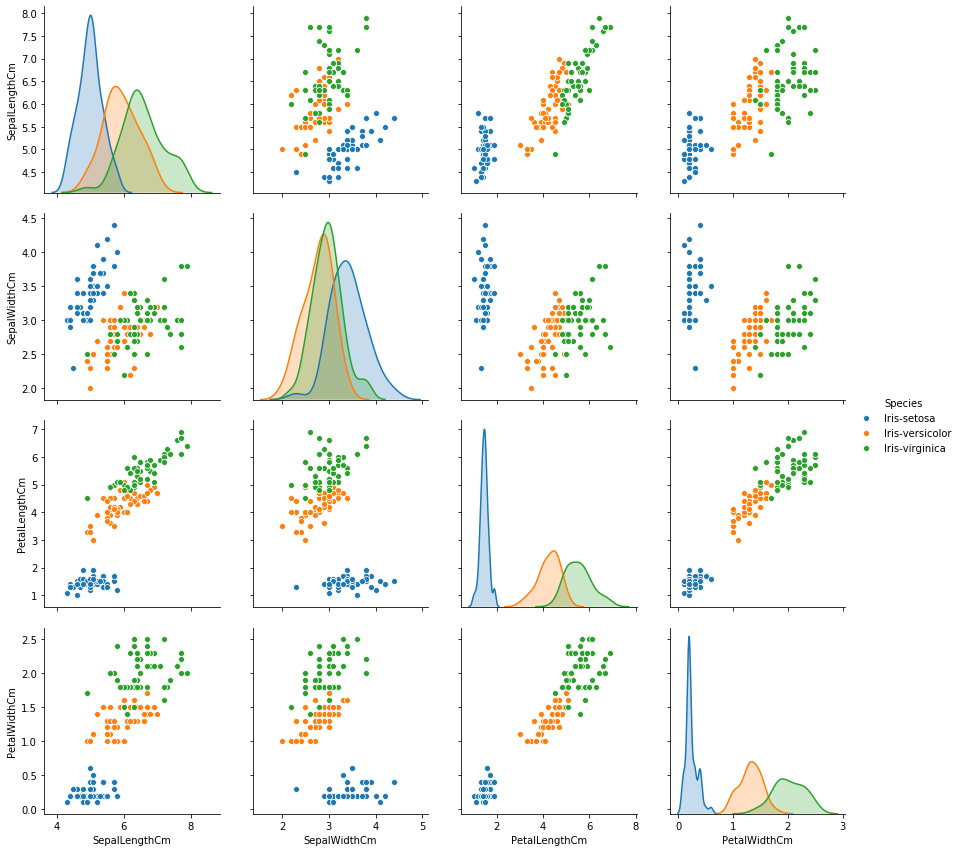

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Species', size=3)

# **3. Preprocessing** 
Pada tahap ini kita akan melakukan preprocessing data yang meliputi :
1. Konversi dataset kita kedalam array
2. Melihat Data Array yang kita punya kedalam `scatter plot`
3. Meskalakan data dengan `Scaler`

In [ ]:
x = np.asarray (df)
print(x)

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

Kode diatas untuk mengubah dataset kita kedalam tipe data array

In [ ]:
x = df.iloc[:, [0,1,2,3]].values

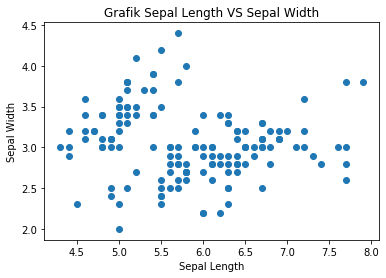

In [ ]:
#Visualize Data
plt.scatter(x[:,0], x[:,1], label='True Posisi')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Grafik Sepal Length VS Sepal Width")
plt.show()

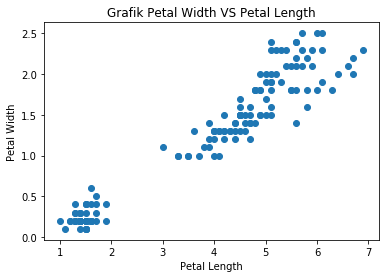

In [ ]:
#Visualize Data
plt.scatter(x[:,2], x[:,3], label='True Posisi')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Grafik Petal Width VS Petal Length")
plt.show()

**Menstandarkan data atau menskalakan data**

Sebelum kita dapat menggunakan data untuk proses training, sebaiknya kita melakukan penskalaan data. Hal ini kita lakukan untuk menyamakan range data agar semua dataset menjadi berimbang sebelum digunakan untuk proses training. 
Dan sebelumnya kita telah mengubah `dataframe` yang ada menjadi sebuah `array`. Disinilah penstandaran data digunakan. Agar data kembali seperti data semula sebelum diarraykan.

In [ ]:
#menstandarkan ukuran variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
pd.DataFrame(x_scaled, columns=["a", "b", "c", "d"])

,a,b,c,d
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


# **4. Training**
Pada tahap ini kita melakukan training data `Iris` dengan `KMeans`. Training data disini di representasikan dalam bentun `KMeans.fit`

Sekarang kita akan melatih algoritma kita. Disini kita akan membuat objek `KMeansClassifier` dengan nilai k=3. Nilai *k* untuk sementara ini kita set secara acak, artinya kita tidak punya dasar apapun untuk menggunakan angka ini.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(x_scaled)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


Disini kita bisa melihat output KMeans menggunakan $n$ sebanyak yang telah kita inputkan sebelumnya.

In [ ]:
#Menampilkan nilai centroid yang digenerate oleh classifier
print(kmeans.cluster_centers_)

[[0.74305556 0.47172619 0.82748184 0.86607143]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.36111111 0.24027778 0.51299435 0.47083333]
 [0.54431217 0.37896825 0.65819209 0.64980159]]


In [ ]:
import numpy as np
print(np.unique(kmeans.labels_))

[0 1 2 3]


Dan inilah grafik cluster yang terbentuk dari data `iris` kita.

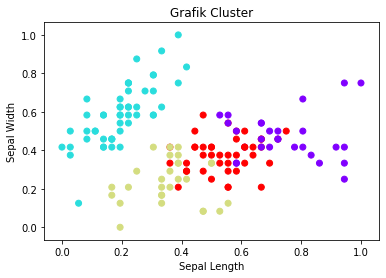

In [ ]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Grafik Cluster')
plt.show()

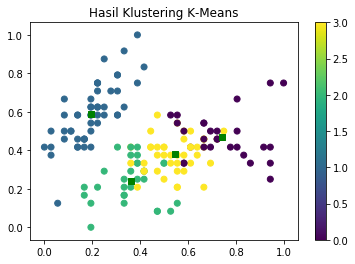

In [ ]:
#--- Memvisualkan hasil kluster ---
#--- Menambahkan Kolom "kluster" Dalam Data Frame Iris ---
df["kluster"] = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], c = df.kluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', alpha=1 , marker="s");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

# **6. Optimization**
Di bagian akhir ini kita akan mengoptimalkan model yang kita buat agar dapat memberikan hasil prediksi yang lebih baik. Disini kita akan mencoba untuk mencari nilai k yang optimal agar model yang kita buat dapat memberikan hasil prediksi yang lebih akurat.

![Elbow Method](https://miro.medium.com/max/832/1*8wV1j-klQA1xFvfaNXuVzg.png)

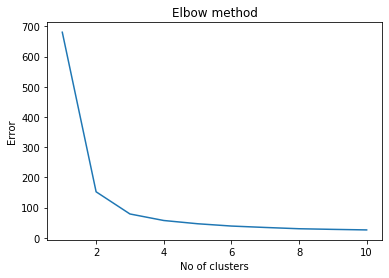

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
# ambil input
sepal_length =  2#@param {type:"number"}
sepal_width =  3#@param {type:"number"}
petal_length =  1#@param {type:"number"}
petal_width =  1#@param {type:"number"}

# buat vektor untuk uji
x_coba = [[sepal_length, sepal_width, petal_length, petal_width]]
x_coba = scaler.transform(x_coba)

# prediksikan dengan model
y_pred = kmeans.predict(x_coba)

# cetak hasil
print("Hasil prediksi: %s" % y_pred[0])

NameError: ignored

**Selamat, kalian sudah belajar clustering!**

# **Reference**

1. **Heartbeat**. 2019. *K-means clustering using sklearn and Python*. https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187 diakses pada 1 Desember 2019 

2. **Medium.2018**. *Memahami K-Mean Clustering Pada Machine Learning Dengan Phyton*. https://medium.com/@16611129/memahami-k-mean-clustering-pada-machine-learning-dengan-phyton-430323d80868 diakses pada 30 November 2019

3.  **UCI Machine Learning**. https://archive.ics.uci.edu/ml/datasets/Iris?spm=a2c4e.11153940.blogcont603256.5.333b1d6f05ZggC Diakses pada 30 November 2019

4. **Wahyono, Teguh**.2018 *Fundamental of Python for Machine Learning* (cetakan 1). Yogyakarta: Penerbit Gava Media